In [1]:
from func import *
import matplotlib.pyplot as plt
from tensorflow import summary as sm
from tensorflow import keras
from keras import models, layers, optimizers
from keras.callbacks import ModelCheckpoint
import datetime
import os
from keras.layers import BatchNormalization,Dropout
import tensorflow as tf

In [2]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # 텐서플로가 첫 번째 GPU에 1GB 메모리만 할당하도록 제한
#   try:
#     tf.config.experimental.set_virtual_device_configuration(
#         gpus[0],
#         [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=9000)])
#   except RuntimeError as 5
#     # 프로그램 시작시에 가상 장치가 설정되어야만 합니다
#     print(e)


In [3]:
VERSION = 'LSTM'


#25도
FILE_00 = 'US06_80_Han.csv'
FILE_01 = 'DST_80_Han.csv'
FILE_02 = 'FUDS_80_Han.csv'
FILE_03 = 'BJDST_80_Han.csv'

# #0도
# FILE_00 = 'US06_80_0deg_Han.csv'
# FILE_01 = 'DST_80_0deg_Han.csv'
# FILE_02 = 'FUDS_80_0deg_Han.csv'
# FILE_03 = 'BJDST_80_0deg_Han.csv'

# #45도
# FILE_00 = 'US06_80_45deg_Han.csv'
# FILE_01 = 'DST_80_45deg_Han.csv'
# FILE_02 = 'FUDS_80_45deg_Han.csv'
# FILE_03 = 'BJDST_80_45deg_Han.csv'



drop_labels_x = ['Data_Point', 'Test_Time(s)', 'Date_Time', 'Step_Time(s)', 'Step_Index', 'Cycle_Index', 'Charge_Capacity(Ah)', 'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)'\
                 , 'Discharge_Energy(Wh)', 'AC_Impedance(Ohm)','SoC(%)','dV/dt(V/s)','ACI_Phase_Angle(Deg)',"SoC"] #SOC 뺴기 (14개)
drop_labels_y = ['Data_Point', 'Test_Time(s)', 'Date_Time', 'Step_Time(s)', 'Step_Index', 'Cycle_Index', 'Charge_Capacity(Ah)', 'Current(A)', 'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)', \
                 'Discharge_Energy(Wh)', 'dV/dt(V/s)', 'AC_Impedance(Ohm)','SoC(%)','ACI_Phase_Angle(Deg)','Voltage(V)'] # V,I 빼기 (15개)

param = {'seq_len' : 50, 'num_units' : 150, 'num_units2' : 16, 'num_filters' : 128, 'window' : 5, 'dropout': 0.2, 'num_epochs' : 4000, 'num_dense': 80, 'batch':64}
Fsize=3

log_dir = f"logs/{VERSION}/" + datetime.datetime.now().strftime("%Y%m%d-%H%M") + f'-{param["num_epochs"]}'
file_path = f'weight\{VERSION}\SOH_Checkpoint\{param["num_epochs"]}\{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}.h5'
hist_freq = 250

save_path = f'picture\{VERSION}\{Fsize}\{param["num_epochs"]}EP'
try:
    if not os.path.exists(save_path):
        os.makedirs(save_path)
except OSError:
    print('Error Creating Directory...')

Index(['Current(A)', 'Voltage(V)'], dtype='object')
Index(['SoC'], dtype='object')
Index(['Current(A)', 'Voltage(V)'], dtype='object')
Index(['SoC'], dtype='object')
Index(['Current(A)', 'Voltage(V)'], dtype='object')
Index(['SoC'], dtype='object')
Index(['Current(A)', 'Voltage(V)'], dtype='object')
Index(['SoC'], dtype='object')
data00 = (10690, 2)


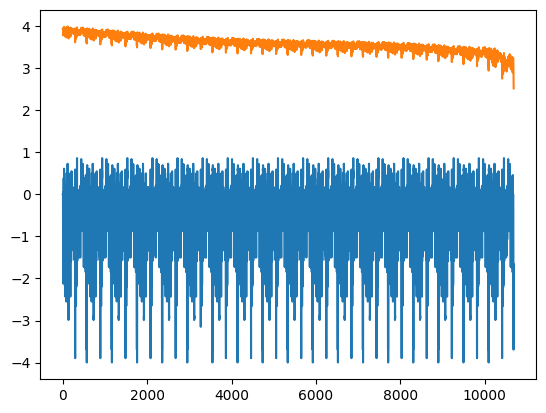

data01 = (10639, 2)


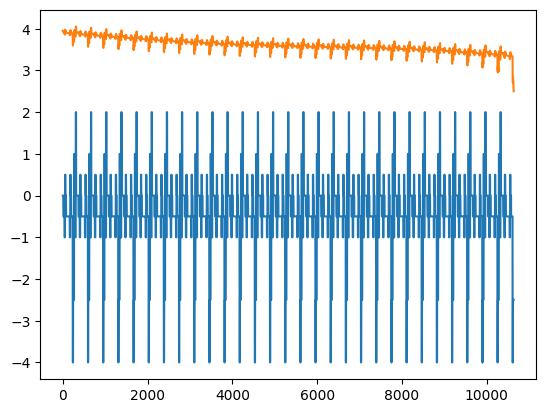

data02 = (11095, 2)


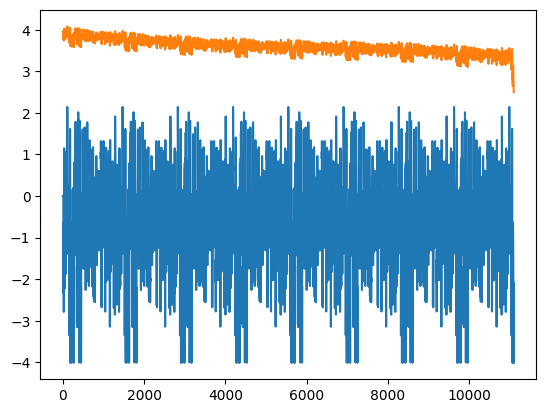

In [4]:
data00, data_cap00 = get_data(FILE_00, drop_labels_x, drop_labels_y)
data01, data_cap01 = get_data(FILE_01, drop_labels_x, drop_labels_y)
data_test1, data_cap_test1 = get_data(FILE_02, drop_labels_x, drop_labels_y)
data_test2, data_cap_test2 = get_data(FILE_03, drop_labels_x, drop_labels_y)

########################25도########################
#US06
A1 = data00[1207:]
A2 = data_cap00[1207:]
#DST
B1 = data01[1919:]
B2 = data_cap01[1919:]
#FUDS
C1 = data_test1[2586:]
C2 = data_cap_test1[2586:]
#BJDST
D1 = data_test2[1226:]
D2 = data_cap_test2[1226:]


# ########################0도########################
# #US06
# A1 = data00[1955:]
# A2 = data_cap00[1955:]
# #DST
# B1 = data01[762:]
# B2 = data_cap01[762:]
# #FUDS
# C1 = data_test1[1904:]
# C2 = data_cap_test1[1904:]
# #BJDST
# D1 = data_test2[8338:]
# D2 = data_cap_test2[8338:]



# ########################45도########################
# #US06
# A1 = data00[1889:]
# A2 = data_cap00[1889:]
# #DST
# B1 = data01[2299:]
# B2 = data_cap01[2299:]
# #FUDS
# C1 = data_test1[1891:]
# C2 = data_cap_test1[1891:]
# #BJDST
# D1 = data_test2[8295:]
# D2 = data_cap_test2[8295:]




data00 = A1 
data_cap00 = A2
data01 = B1
data_cap01 = B2
data_test1 = C1
data_cap_test1 = C2
data_test2 = D1
data_cap_test2 = D2


print(f'data00 = {data00.shape}')
pl.plot(data00)
pl.show()
print(f'data01 = {data01.shape}')
pl.plot(data01)
pl.show()
print(f'data02 = {data_test1.shape}')
pl.plot(data_test1)
pl.show()
savedata00 =  data00
savedata_cap00 =  data_cap00
savedata01 =  data01
savedata_cap01 =  data_cap01

savedata_test = data_cap_test1
savedata_cap_test = data_cap_test1

In [5]:
# mMscaler = MinMaxScaler(feature_range=(0.0001, 1))
# data00= mMscaler.fit_transform(data00)
# data_cap00= mMscaler.fit_transform(data_cap00)
# data01= mMscaler.fit_transform(data01)
# data_cap01= mMscaler.fit_transform(data_cap01)
# data_test= mMscaler.fit_transform(data_test)
# data_cap_test= mMscaler.fit_transform(data_cap_test)




In [6]:
# data00 = data00[Fsize//2:data00.shape[0]-Fsize//2]
# data_cap00 = data_cap00[Fsize//2:data_cap00.shape[0]-Fsize//2]
# data01 = data01[Fsize//2:data01.shape[0]-Fsize//2]
# data_cap01 = data_cap01[Fsize//2:data_cap01.shape[0]-Fsize//2]
# data_test = data_test[Fsize//2:data_test.shape[0]-Fsize//2]
# data_cap_test = data_cap_test[Fsize//2:data_cap_test.shape[0]-Fsize//2]

In [7]:
# print(f'data00 = {data00.shape}')
# print(f'data_cap00 = {data_cap00.shape}')
# print(f'data00 = {data_cap00[0:6]}')
# print(f'data00 = {type(data_cap00)}')
# pl.plot(data_cap00)
# pl.show()
# print(f'data01 = {data01.shape}')
# pl.plot(data_cap01)
# pl.show()
# print(f'data_test = {data_test.shape}')
# pl.plot(data_cap_test)
# pl.show()

In [8]:
# #필터
# Fsize=5
# data00 = lowpass1(data00, Fsize)[Fsize:]
# data_cap00 = lowpass1(data_cap00,Fsize)[Fsize:]
# data01 = lowpass1(data01,Fsize)[Fsize:]
# data_cap01 = lowpass1(data_cap01,Fsize)[Fsize:]
# data_test = lowpass1(data_test,Fsize)[Fsize:]
# data_cap_test = lowpass1(data_cap_test,Fsize)[Fsize:]
# size=(int)(savedata00.shape[0]-Fsize/2)
# savedata00 =  savedata00[Fsize:size]
# savedata_cap00 =  savedata_cap00[Fsize:size]
# savedata01 =  savedata01[Fsize:size]
# savedata_cap01 =  savedata_cap01[Fsize:size]
# savedata_test = savedata_test[Fsize:size]
# savedata_cap_test = savedata_cap_test[Fsize:size]

# print(f'data00 = {data00.shape}')
# print(f'savedata00 = {savedata_cap_test.shape}')

In [9]:
# from sklearn.model_selection import train_test_split

# data00, data00_val, data_cap00, data_cap00_val = train_test_split(data00, data_cap00, test_size=0.1, shuffle=False)
# data01, data01_val, data_cap01, data_cap01_val = train_test_split(data01, data_cap01, test_size=0.1, shuffle=True)

# print(data00.shape)
# print(data00_val.shape)
# print(data_cap00.shape)
# print(data_cap00_val.shape)
# print(data01.shape)
# print(data01_val.shape)

# pl.plot(data00)
# pl.show()
# pl.plot(data_cap00)
# pl.show()
# pl.plot(data_cap00_val)
# pl.show()

In [10]:
x_train00 = seq_gen_x(data00, param['seq_len'])
y_train00 = seq_gen_y(data_cap00, param['seq_len'])
x_train01 = seq_gen_x(data01, param['seq_len'])
y_train01 = seq_gen_y(data_cap01, param['seq_len'])
x_test1 = seq_gen_x(data_test1, param['seq_len'])
y_test1 = seq_gen_y(data_cap_test1, param['seq_len'])
x_test2 = seq_gen_x(data_test2, param['seq_len'])
y_test2 = seq_gen_y(data_cap_test2, param['seq_len'])


print(x_train00.shape)
print(y_train00.shape)
print(x_train01.shape)
print(y_train01.shape)
print(x_test1.shape)
print(y_test1.shape)
# print(x_train00[0, 0:6, 1])
# count=savedata_cap_test.shape[0]-y_test.shape[0]*y_test.shape[1]
# print(count)

(10639, 50, 2)
(10639, 1)
(10588, 50, 2)
(10588, 1)
(11044, 50, 2)
(11044, 1)


In [11]:
# from keras.optimizers import rmsprop_experimental, adagrad_experimental, \
#     Adam, Adamax, Nadam,SGD
# import tensorflow as tf

# def set_optimizer(OPT, lr, EPOCHS):
#   OPT = OPT.lower()
#   if OPT == 'adam':
#     return Adam(lr)
#   elif OPT == 'adamax':
#     CosineAnnealing = tf.keras.optimizers.schedules.CosineDecay(lr, EPOCHS, 0.2) # 0.1
#     return Adamax(CosineAnnealing)
#   elif OPT == 'sgd':
#     CosineAnnealing = tf.keras.optimizers.schedules.CosineDecay(lr, EPOCHS, 0.2) # 0.1
#     return SGD(CosineAnnealing, momentum = 0.9,lr=0.01,clipvalue=1.0)
#   # elif OPT == 'rmsprop':
#   #   return rmsprop_experimental()
#   # elif OPT == 'nadam':A
#   #   CosineAnnealing = tf.keras.optimizers.schedules.CosineDecay(lr, EPOCHS, 0.2) # 0.1
#   #   return Nadam(CosineAnnealing)
#   # elif OPT == 'adagrad':
#   #   return adagrad_experimental()
#   else:
#     print("no preset optimizer in the function")

In [12]:

# sgd=set_optimizer('SGD', 0.1, 2000)
opt = keras.optimizers.legacy.Adam(learning_rate=1e-3)

In [13]:
model = models.Sequential()
# model.add(layers.Conv1D(param['num_filters'], param['window'], padding='causal', input_shape = (None, x_train00.shape[-1])))
model.add(layers.LSTM(param['num_units'], return_sequences = False, input_shape = (None, x_train00.shape[-1])))
# model.add(BatchNormalization())
model.add(layers.Dense(param['num_dense']))
# model.add(BatchNormalization())
model.add(layers.Dense(1))
model.compile(loss = 'mse', optimizer = opt) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               91800     
                                                                 
 dense (Dense)               (None, 80)                12080     
                                                                 
 dense_1 (Dense)             (None, 1)                 81        
                                                                 
Total params: 103,961
Trainable params: 103,961
Non-trainable params: 0
_________________________________________________________________


In [14]:
callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True)]
fitdata = model.fit(x_train00, y_train00, epochs=param['num_epochs'], verbose = 0, validation_split=0.01, callbacks=callback_list,batch_size=param['batch'] )
callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True)]
fitdata = model.fit(x_train01, y_train01, epochs=param['num_epochs'], verbose = 0, validation_split=0.01, callbacks=callback_list,batch_size=param['batch'] )

In [15]:
# EP=0
# for i in range(0,100):
#     EP=EP+param["num_epochs"]
#     callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True)]
#     fitdata = model.fit(x_train00, y_train00, epochs=param['num_epochs'], verbose = 1, validation_data=(x_train01,y_train01), callbacks=callback_list,batch_size=param['batch'])
#     # callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True)]
#     # fitdata = model.fit(x_train01, y_train01, epochs=param['num_epochs'], verbose = 0, validation_split = 0.01, callbacks=callback_list,batch_size=param['batch'])
#     RMSE_total, MAE_total, Error_rate, prediction_graph, y_graph = prove(model, file_path, x_test, y_test)
#     Error_rate = []
#     Error = []

#     for step in range(len(prediction_graph)):
#          # Error_rate.append((prediction_graph[step] - savedata_cap_test[step]) / savedata_cap_test[step] * 100)
#          Error_rate.append((prediction_graph[step] - y_graph[step]))
#          Error.append(Error_rate[step])
    

#     RMSE_total = np.sqrt(np.mean(np.square(Error)))
#     MAE_total = np.mean(np.absolute(Error))
#     pl.figure(dpi=150)
#     line = pl.plot(Error_rate)
#     pl.ylim(-10, 10)
#     pl.ylabel('SOC Error (%)')
#     pl.xlabel('time(s)')
#     pl.setp(line, color='b', linewidth=0.5)
#     pl.savefig(f'{save_path}\Epoch {EP} RMSE {RMSE_total:.6f},MAE {MAE_total:.6f}.png')
#     pl.show()
#     print(f'RMSE({RMSE_total:.6f}), MAE({MAE_total:.6f}), EP : {EP}')
#     pl.figure(dpi=500)
#     pl.ylabel('Voltage')
#     pl.xlabel('Time(s)')
#     line = pl.plot(prediction_graph, label = 'Voltage Estimation')
#     pl.setp(line, linewidth=0.5)

#     # y_line = pl.plot(savedata_cap_test, label = 'Voltage Reference')
#     y_line = pl.plot(y_graph, label = 'Voltage Reference')
#     pl.setp(y_line, linewidth=0.5)
    
#     pl.legend()
#     pl.savefig(f'{save_path}\ESTI Epoch {EP} RMSE {RMSE_total:.6f},MAE {MAE_total:.6f}.png')
#     pl.show()


In [16]:
from calendar import EPOCH

# model.load_weights(file_path)
prediction = model.predict(x_test1)

print(prediction.shape)
prediction_graph = flatten_2Dto1D(prediction)
y_graph = flatten_2Dto1D(y_test1)
print(prediction_graph.shape)
print(y_graph.shape)

print(save_path)

346/346 [==============================] - 1s 2ms/step
(11044, 1)
(11044, 1)
(11044, 1)
picture\LSTM\3\4000EP


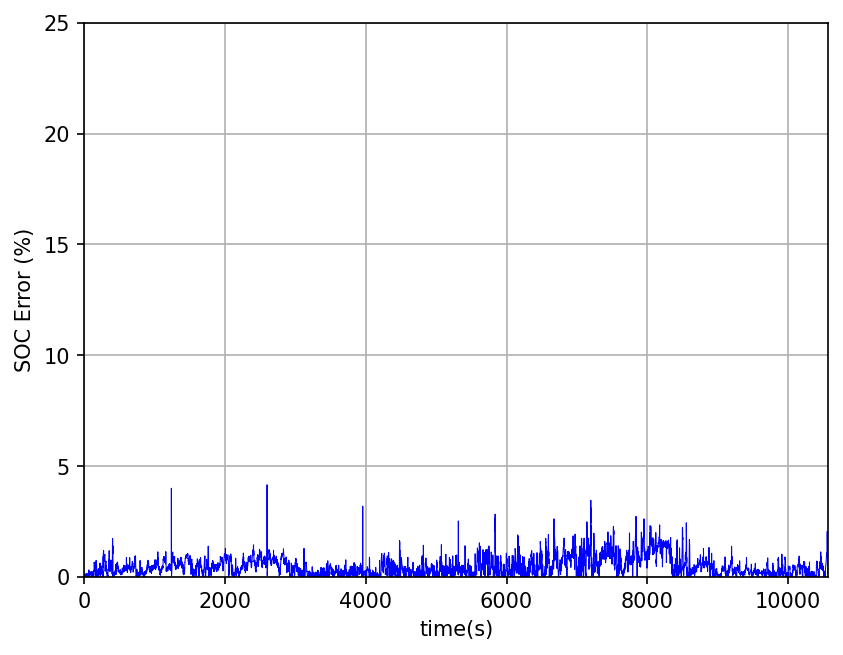

RMSE(0.647995), MAE(0.491289)


In [17]:
#필터 안적용시
Error_rate = []
Error = []

# for step in range(len(prediction_graph)):
#         # Error_rate.append((prediction_graph[step] - savedata_cap_test[step]) / savedata_cap_test[step] * 100)
#         Error.append((prediction_graph[step] - y_graph[step]))

for step in range(len(prediction_graph)):
        # Error_rate.append((prediction_graph[step] - savedata_cap_test[step]) / savedata_cap_test[step] * 100)
        Error_rate.append((prediction_graph[step] - y_graph[step]))
        Error.append(Error_rate[step])


RMSE_total = np.sqrt(np.mean(np.square(Error)))
MAE_total = np.mean(np.absolute(Error))
pl.figure(dpi=150)
line = pl.plot(np.absolute(Error))
pl.ylim(0, 25)
pl.ylabel('SOC Error (%)')
pl.xlabel('time(s)')
pl.setp(line, color='b', linewidth=0.5)
plt.xlim([0, 10575])      # X축의 범위: [xmin, xmax]
plt.grid(True)
# pl.savefig(f'{save_path}\RMSE {RMSE_total:.6f},MAE {MAE_total:.6f}.png')


# pl.savefig(f'4/RMSE {RMSE_total:.6f},MAE {MAE_total:.6f}.png')

pl.show()
print(f'RMSE({RMSE_total:.6f}), MAE({MAE_total:.6f})')

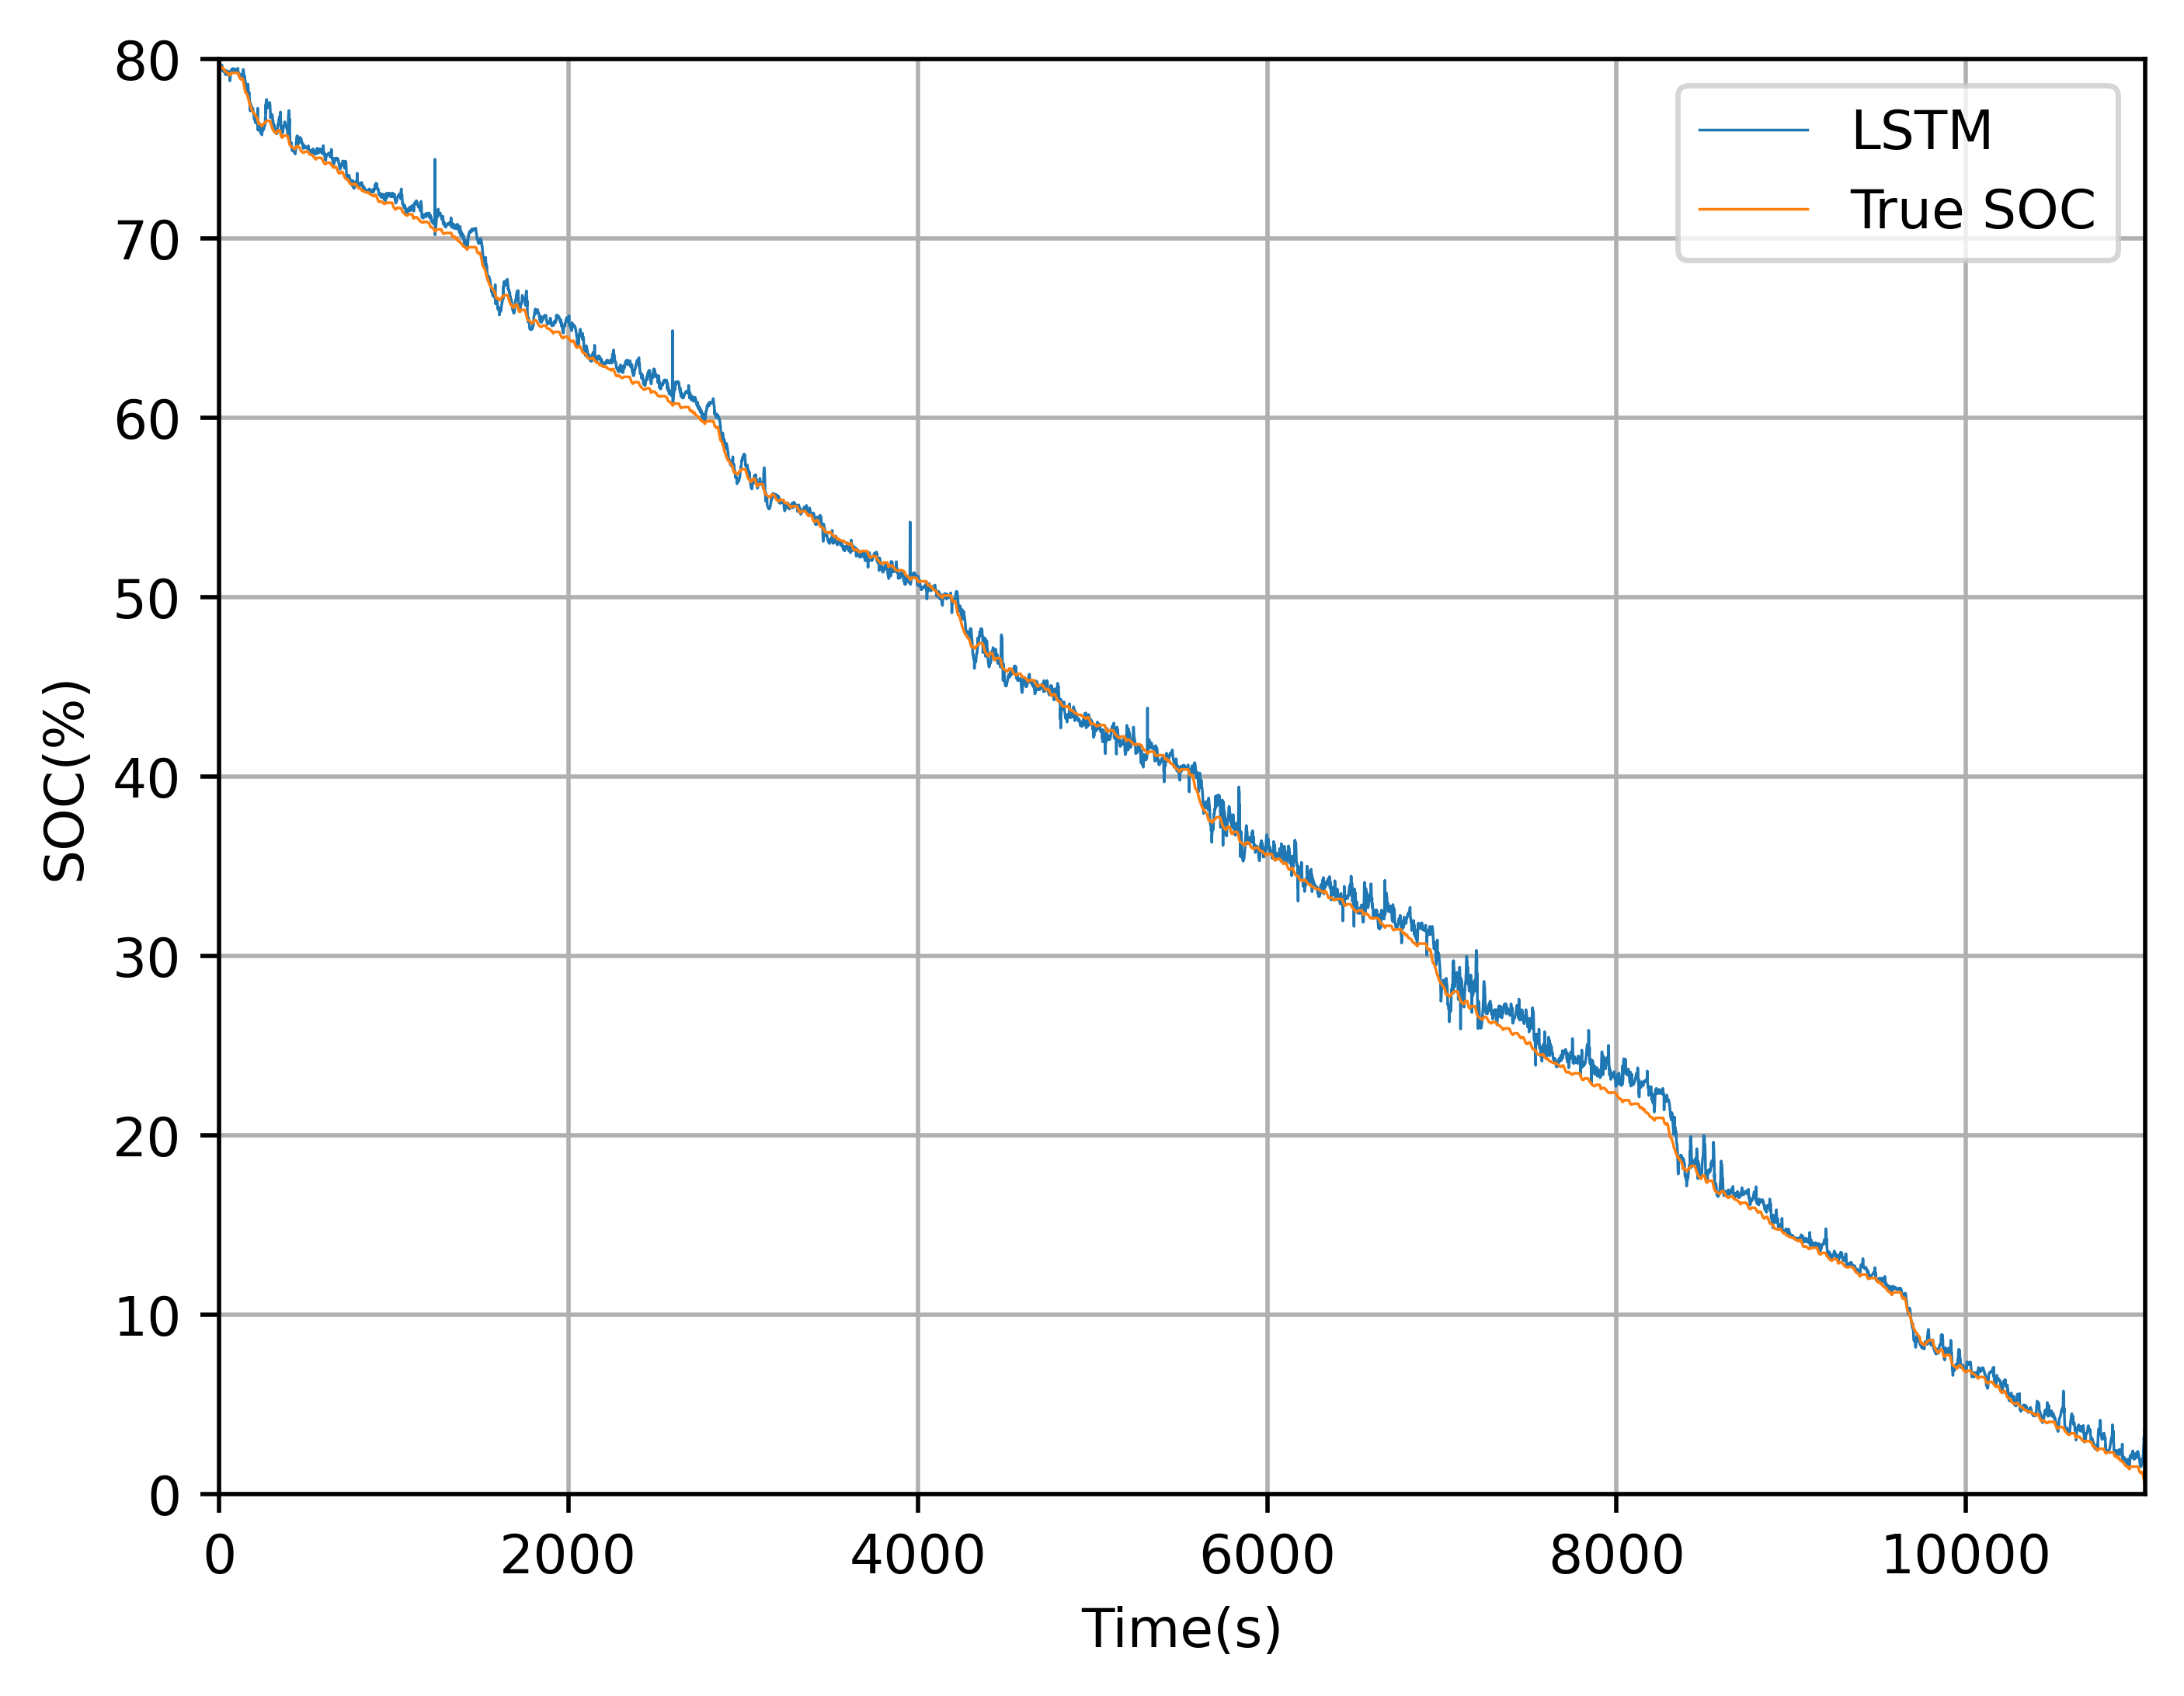

RMSE(0.647995), MAE(0.491289)


In [18]:
pl.figure(dpi=500)
pl.ylabel('SOC(%)')
pl.xlabel('Time(s)')
line = pl.plot(prediction_graph, label = 'LSTM')
pl.setp(line, linewidth=0.5)

# y_line = pl.plot(savedata_cap_test, label = 'Voltage Reference')
y_line = pl.plot(y_graph, label = 'True SOC')
pl.setp(y_line, linewidth=0.5)
pl.legend()
plt.xlim([0, 11026])      # X축의 범위: [xmin, xmax]
plt.ylim([0, 80])
plt.grid(True)
# pl.savefig(f'4/ESTI RMSE {RMSE_total:.6f},MAE {MAE_total:.6f}.png')

pl.show()
print(f'RMSE({RMSE_total:.6f}), MAE({MAE_total:.6f})')

In [19]:
from calendar import EPOCH

# model.load_weights(file_path)
prediction2 = model.predict(x_test2)

print(prediction2.shape)
prediction_graph2 = flatten_2Dto1D(prediction2)
y_graph2 = flatten_2Dto1D(y_test2)
print(prediction_graph2.shape)
print(y_graph2.shape)

print(save_path)

349/349 [==============================] - 1s 2ms/step
(11160, 1)
(11160, 1)
(11160, 1)
picture\LSTM\3\4000EP


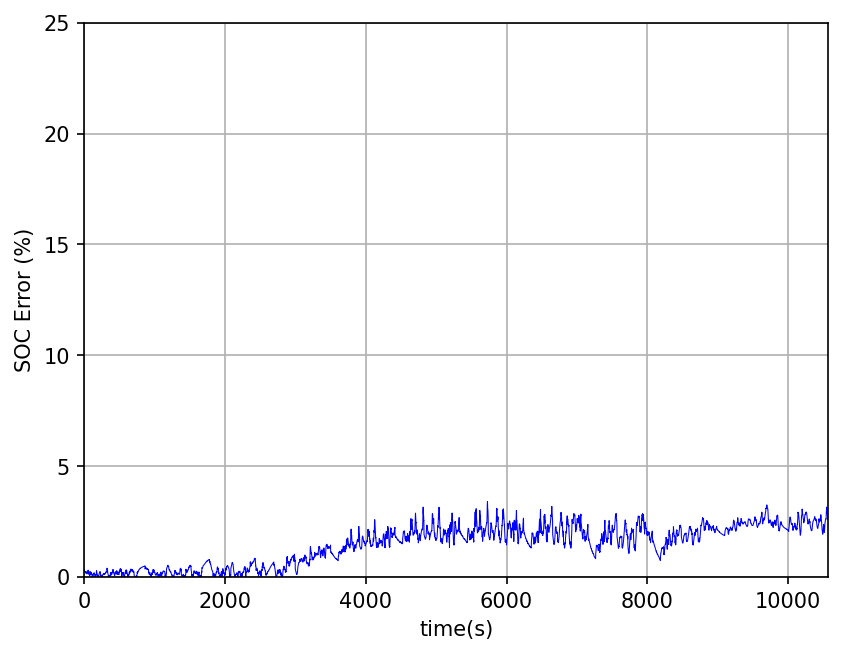

RMSE(1.707608), MAE(1.452382)


In [20]:
#필터 안적용시
Error_rate2 = []
Error2 = []

# for step in range(len(prediction_graph)):
#         # Error_rate.append((prediction_graph[step] - savedata_cap_test[step]) / savedata_cap_test[step] * 100)
#         Error.append((prediction_graph[step] - y_graph[step]))

for step in range(len(prediction_graph2)):
        # Error_rate.append((prediction_graph[step] - savedata_cap_test[step]) / savedata_cap_test[step] * 100)
        Error_rate2.append((prediction_graph2[step] - y_graph2[step]))
        Error2.append(Error_rate2[step])


RMSE_total2 = np.sqrt(np.mean(np.square(Error2)))
MAE_total2 = np.mean(np.absolute(Error2))
pl.figure(dpi=150)
line = pl.plot(np.absolute(Error2))
pl.ylim(0, 25)
pl.ylabel('SOC Error (%)')
pl.xlabel('time(s)')
pl.setp(line, color='b', linewidth=0.5)
plt.xlim([0, 10575])      # X축의 범위: [xmin, xmax]
plt.grid(True)
# pl.savefig(f'{save_path}\RMSE {RMSE_total:.6f},MAE {MAE_total:.6f}.png')


# pl.savefig(f'4/RMSE {RMSE_total:.6f},MAE {MAE_total:.6f}.png')

pl.show()
print(f'RMSE({RMSE_total2:.6f}), MAE({MAE_total2:.6f})')

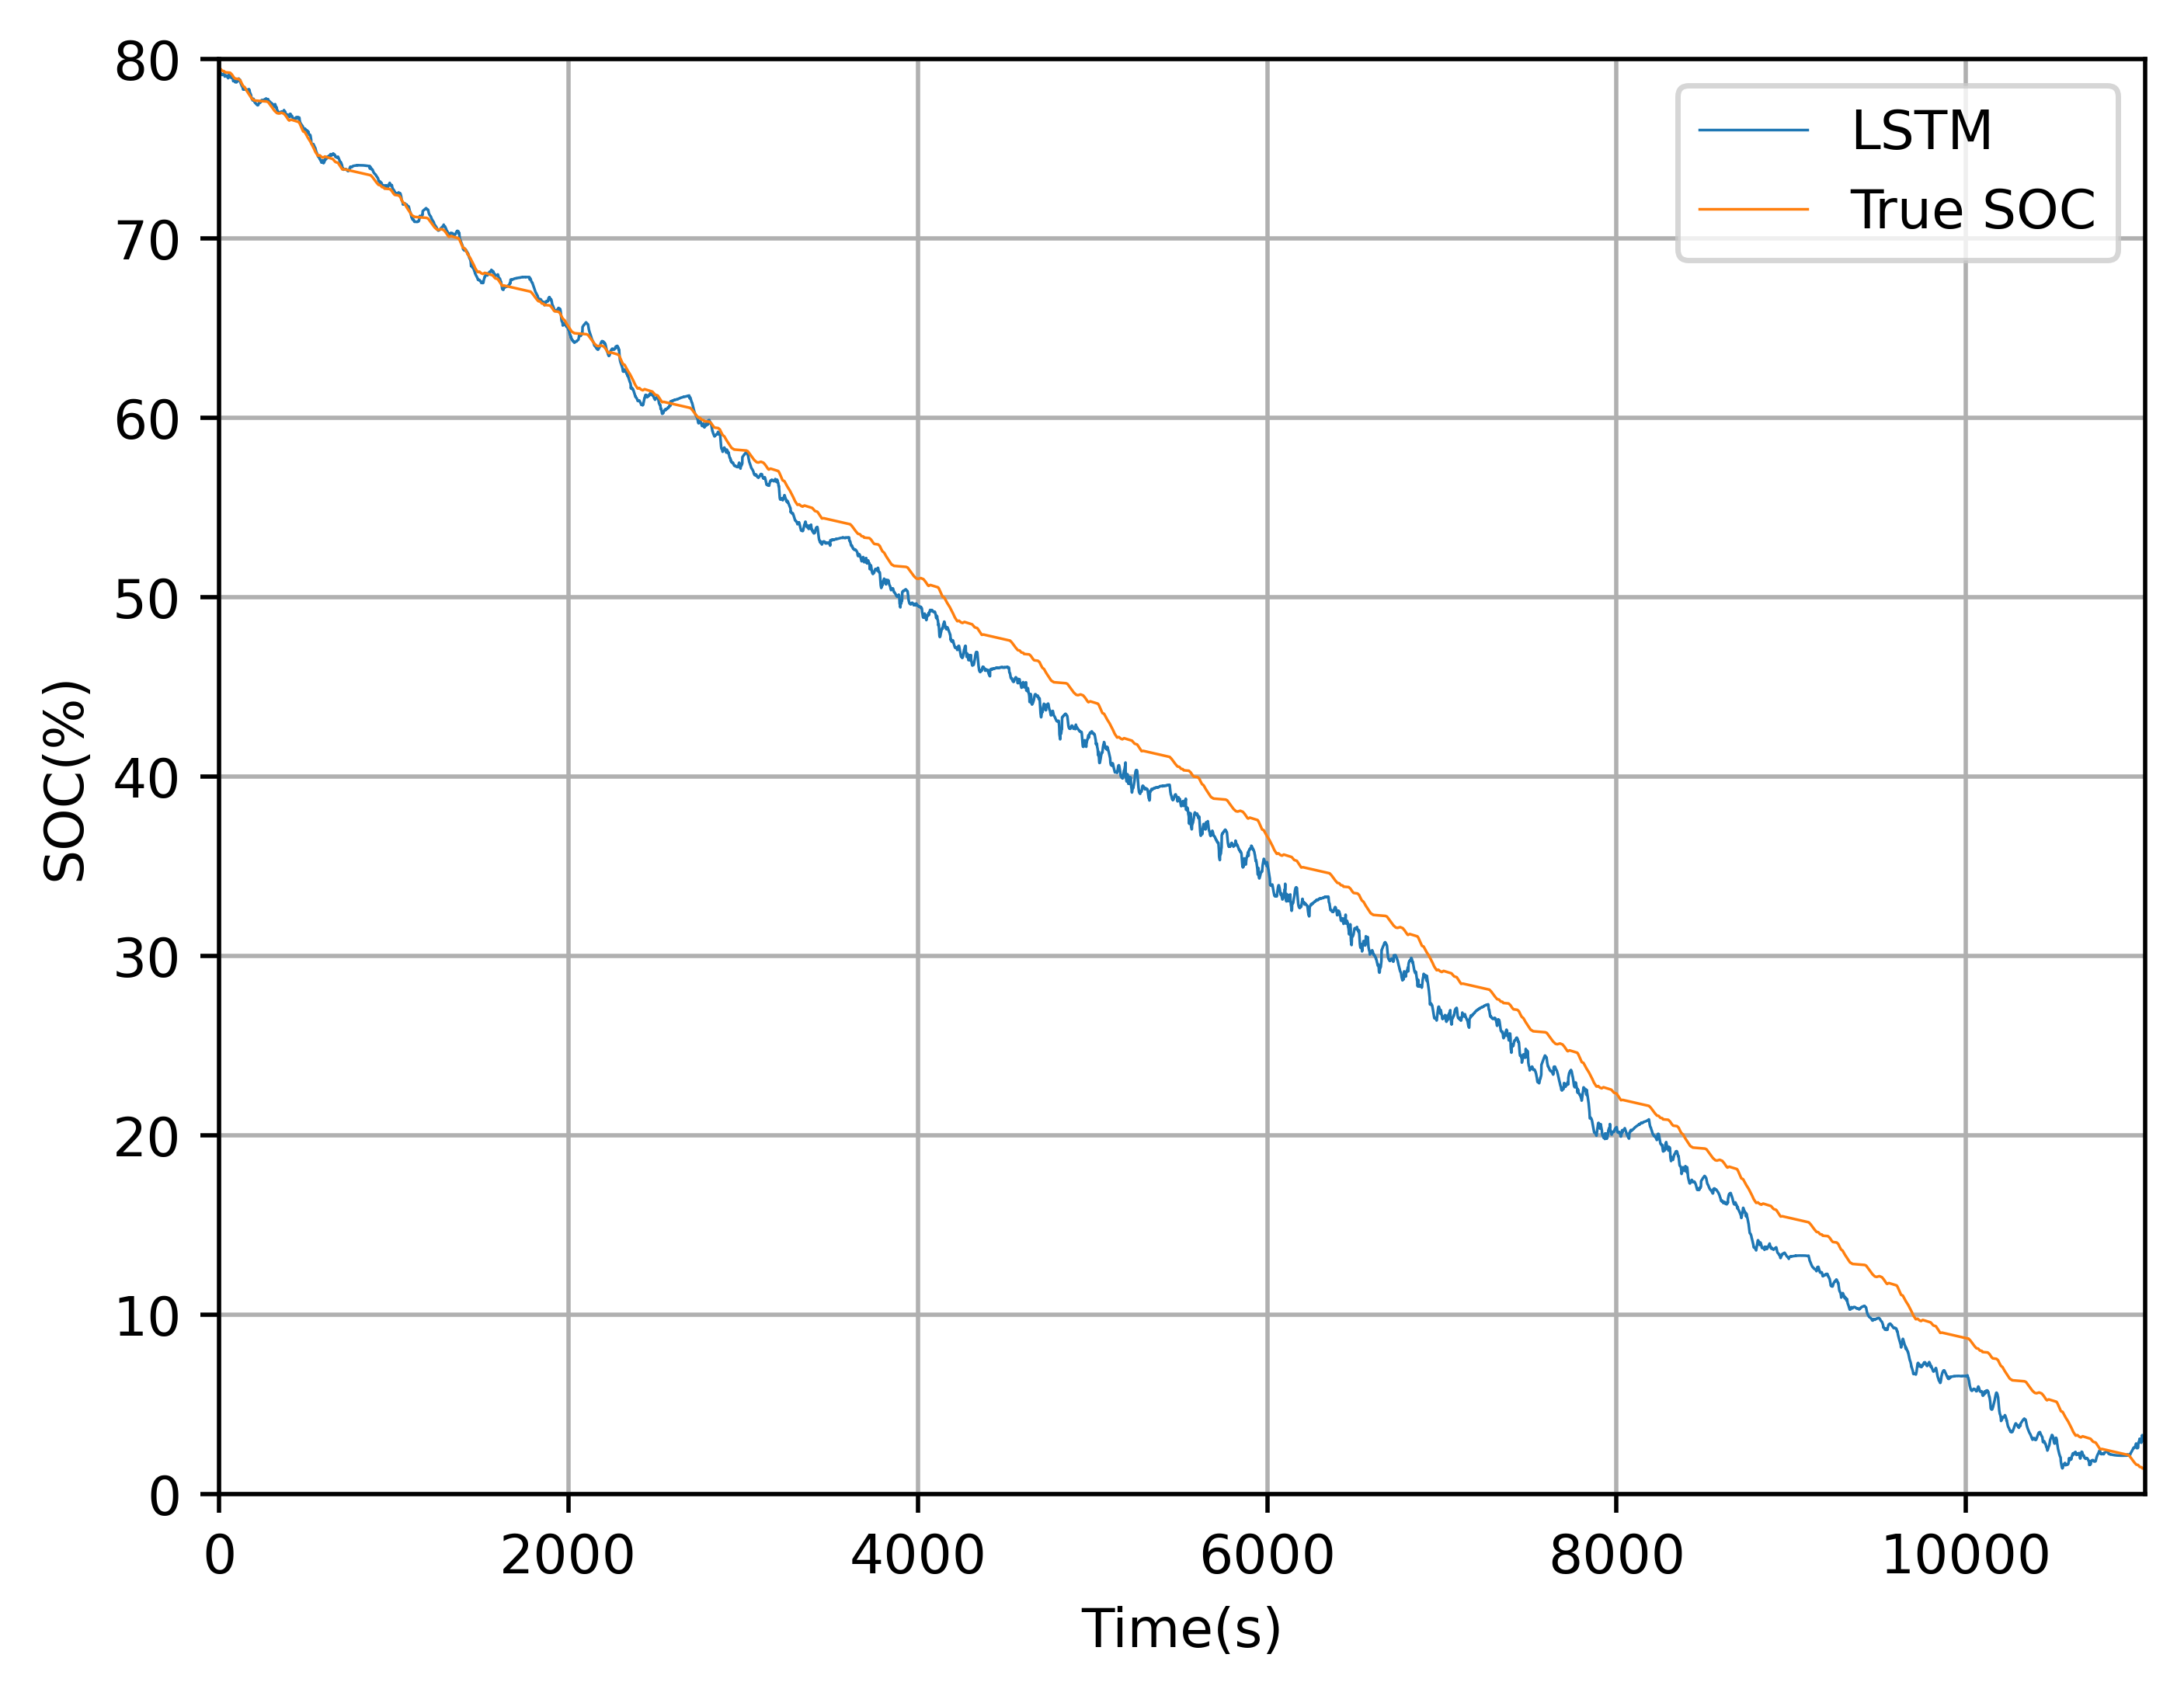

RMSE(1.707608), MAE(1.452382)


In [21]:
pl.figure(dpi=500)
pl.ylabel('SOC(%)')
pl.xlabel('Time(s)')
line2 = pl.plot(prediction_graph2, label = 'LSTM')
pl.setp(line2, linewidth=0.5)

# y_line = pl.plot(savedata_cap_test, label = 'Voltage Reference')
y_line2 = pl.plot(y_graph2, label = 'True SOC')
pl.setp(y_line2, linewidth=0.5)
pl.legend()
plt.xlim([0, 11026])      # X축의 범위: [xmin, xmax]
plt.ylim([0, 80])
plt.grid(True)
# pl.savefig(f'4/ESTI RMSE {RMSE_total:.6f},MAE {MAE_total:.6f}.png')

pl.show()
print(f'RMSE({RMSE_total2:.6f}), MAE({MAE_total2:.6f})')

In [22]:
# #필터적용시
# from calendar import EPOCH

# RMSE_total, MAE_total, Error_rate, prediction_graph, y_graph = prove(model, file_path, x_test, y_test)
# print(prediction_graph.shape)
# print(y_graph.shape)
# print(savedata_cap_test.shape)
# print('......')
# prediction_graph=relow2(prediction_graph, y_graph, Fsize)
# lsize=(int)(y_graph.shape[0]-Fsize/2)
# prediction_graph=prediction_graph[Fsize:]
# y_graph=y_graph[Fsize:lsize]

# print(prediction_graph.shape)
# print(y_graph.shape)
# pl.figure(dpi=2500)
# pl.ylabel('Voltage')
# pl.xlabel('Time(s)')
# line = pl.plot(prediction_graph, label = 'Voltage Estimation')
# pl.setp(line, linewidth=0.5)

# y_line = pl.plot(y_graph, label = 'Voltage Reference')
# # y_line = pl.plot(y_graph, label = 'Voltage Reference')
# pl.setp(y_line, linewidth=0.5)
# pl.legend()
# pl.savefig(f'{save_path}\Estimation.png')
# pl.show()

In [23]:
# #필터 적용시
# Error_rate = []
# Error = []

# for step in range(len(prediction_graph)):
#         Error_rate.append((prediction_graph[step] - y_graph[step]) / y_graph[step] * 100)
#         # Error_rate.append((prediction_graph[step] - y_graph[step]) / y_graph[step] * 100)
#         Error.append(Error_rate[step] / 100)
    

# RMSE_total = np.sqrt(np.mean(np.square(Error)))
# MAE_total = np.mean(np.absolute(Error))
# pl.figure(dpi=150)
# line = pl.plot(Error_rate)
# pl.ylim(-10, 10)
# pl.ylabel('SOC Error (%)')
# pl.xlabel('time(s)')
# pl.setp(line, color='b', linewidth=0.5)
# pl.show()
# print(f'RMSE({RMSE_total:.6f}), MAE({MAE_total:.6f})')

In [24]:
print(prediction_graph.shape)
print(y_graph.shape)

(11044, 1)
(11044, 1)
